<h1>Using R with Amazon SageMaker</h1>

This sample SageMaker R Notebook provides a very basic example to demonstrate how to build a customized R container by using a [SageMaker Lifecycle Configuration script](https://docs.aws.amazon.com/sagemaker/latest/dg/notebook-lifecycle-config.html) script.

First, we show a working example of a simple R time-series model using AutoTS(), proving that we have pulled in all the required dependencies. Next we persist our dependencies so that they can be used to easily bootstrap this or other notebooks. Finally, we show how and where to store the LifeCycle script.

This notebook is part of a series that demonstrate machine learning (ML) models using [Amazon SageMaker](https://aws.amazon.com/sagemaker/) and [R](https://www.r-project.org/). The [reticulate](https://rstudio.github.io/reticulate/) package will be used as an R interface to [Amazon SageMaker Python SDK](https://sagemaker.readthedocs.io/en/latest/index.html) to make API calls to Amazon SageMaker. The `reticulate` package translates between R and Python objects, and Amazon SageMaker provides a serverless data science environment to train and deploy ML models at scale.


<h3>Reticulating the Amazon SageMaker Python SDK</h3>

In order to allow "R" code to reference SageMaker modules via the Python SDK, we will load the `reticulate` library and import the `sagemaker` Python module. Once the module is loaded, use the `$` notation in R instead of the `.` notation in Python to use available classes. 

### RemixAutoML 

The libraries below are dependencies of RemixAutoML package which gives us access to AutoTS() functions:

Link: https://github.com/AdrianAntico/RemixAutoML

In [1]:
# Turn warnings off globally
options(warn=-1)

In [2]:
# Install Dependencies----
if(!("remotes" %in% rownames(installed.packages()))) install.packages("remotes"); print("remotes")
if(!("arules" %in% rownames(installed.packages()))) install.packages("arules"); print("arules")
if(!("bit64" %in% rownames(installed.packages()))) install.packages("bit64"); print("bit64")
if(!("caTools" %in% rownames(installed.packages()))) install.packages("caTools"); print("caTools")
if(!("combinat" %in% rownames(installed.packages()))) install.packages("combinat"); print("combinat")
if(!("data.table" %in% rownames(installed.packages()))) install.packages("data.table"); print("data.table")
if(!("doParallel" %in% rownames(installed.packages()))) install.packages("doParallel"); print("doParallel")
if(!("e1071" %in% rownames(installed.packages()))) install.packages("e1071"); print("e1071")
if(!("fBasics" %in% rownames(installed.packages()))) install.packages("fBasics"); print("fBasics")
if(!("foreach" %in% rownames(installed.packages()))) install.packages("foreach"); print("foreach")
if(!("forecast" %in% rownames(installed.packages()))) install.packages("forecast"); print("forecast")
if(!("fpp" %in% rownames(installed.packages()))) install.packages("fpp"); print("fpp")
if(!("ggplot2" %in% rownames(installed.packages()))) install.packages("ggplot2"); print("ggplot2")
if(!("gridExtra" %in% rownames(installed.packages()))) install.packages("gridExtra"); print("gridExtra")
if(!("here" %in% rownames(installed.packages()))) install.packages("here"); print("here")
if(!("itertools" %in% rownames(installed.packages()))) install.packages("itertools"); print("itertools")
if(!("lime" %in% rownames(installed.packages()))) install.packages("lime"); print("lime")
if(!("lubridate" %in% rownames(installed.packages()))) install.packages("lubridate"); print("lubridate")
if(!("Matrix" %in% rownames(installed.packages()))) install.packages("Matrix"); print("Matrix")
if(!("MLmetrics" %in% rownames(installed.packages()))) install.packages("MLmetrics"); print("MLmetrics")
if(!("monreg" %in% rownames(installed.packages()))) install.packages("monreg"); print("monreg")
if(!("nortest" %in% rownames(installed.packages()))) install.packages("nortest"); print("nortest")
if(!("RColorBrewer" %in% rownames(installed.packages()))) install.packages("RColorBrewer"); print("RColorBrewer")
if(!("recommenderlab" %in% rownames(installed.packages()))) install.packages("recommenderlab"); print("recommenderlab")
if(!("ROCR" %in% rownames(installed.packages()))) install.packages("ROCR"); print("ROCR")
if(!("pROC" %in% rownames(installed.packages()))) install.packages("pROC"); print("pROC")
if(!("Rcpp" %in% rownames(installed.packages()))) install.packages("Rcpp"); print("Rcpp")
if(!("scatterplot3d" %in% rownames(installed.packages()))) install.packages("scatterplot3d"); print("scatterplot3d")
if(!("stringr" %in% rownames(installed.packages()))) install.packages("stringr"); print("stringr")
if(!("sde" %in% rownames(installed.packages()))) install.packages("sde"); print("sde")
if(!("timeDate" %in% rownames(installed.packages()))) install.packages("timeDate"); print("timeDate")
if(!("tsoutliers" %in% rownames(installed.packages()))) install.packages("tsoutliers"); print("tsoutliers")
if(!("wordcloud" %in% rownames(installed.packages()))) install.packages("wordcloud"); print("wordcloud")
if(!("xgboost" %in% rownames(installed.packages()))) install.packages("xgboost"); print("xgboost")
for (pkg in c("RCurl","jsonlite")) if (! (pkg %in% rownames(installed.packages()))) { install.packages(pkg) }
install.packages("h2o", type = "source", repos = (c("http://h2o-release.s3.amazonaws.com/h2o/latest_stable_R")))


[1] "remotes"
[1] "arules"
[1] "bit64"
[1] "caTools"
[1] "combinat"
[1] "data.table"
[1] "doParallel"
[1] "e1071"
[1] "fBasics"
[1] "foreach"
[1] "forecast"
[1] "fpp"
[1] "ggplot2"
[1] "gridExtra"
[1] "here"
[1] "itertools"
[1] "lime"
[1] "lubridate"
[1] "Matrix"
[1] "MLmetrics"
[1] "monreg"
[1] "nortest"
[1] "RColorBrewer"
[1] "recommenderlab"
[1] "ROCR"
[1] "pROC"
[1] "Rcpp"
[1] "scatterplot3d"
[1] "stringr"
[1] "sde"
[1] "timeDate"
[1] "tsoutliers"
[1] "wordcloud"
[1] "xgboost"


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
remotes::install_github('catboost/catboost', subdir = 'catboost/R-package')
remotes::install_github('AdrianAntico/RemixAutoML', upgrade = FALSE, dependencies = FALSE, force = TRUE)


✔  checking for file ‘/tmp/RtmpBeGaij/remotes42893cf286a9/catboost-catboost-ce66b76/catboost/R-package/DESCRIPTION’ ...
─  preparing ‘catboost’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘catboost_0.23.2.tar.gz’
   


✔  checking for file ‘/tmp/RtmpBeGaij/remotes428971fd01b6/AdrianAntico-RemixAutoML-3ceb834/DESCRIPTION’ ...
─  preparing ‘RemixAutoML’:
✔  checking DESCRIPTION meta-information ...
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘RemixAutoML_0.2.4.tar.gz’
   


In [4]:
library(fpp)
library(lubridate)
library(RemixAutoML)

Loading required package: forecast
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Loading required package: fma
Loading required package: expsmooth
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: tseries

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [5]:
# Install TicToc to measure code running time
install.packages('tictoc', repos='http://cran.us.r-project.org')
library(tictoc)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
# If you want to verify the currently installed packages, uncomment the following line and run it
installed.packages()

,Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,MD5sum,NeedsCompilation,Built
arules,arules,/home/ec2-user/anaconda3/envs/R/lib/R/library,1.6-6,NA,"R (>= 3.4.0), Matrix (>= 1.2-0)","stats, methods, graphics, utils",NA,"pmml, XML, arulesViz, testthat",NA,GPL-3,NA,NA,NA,NA,yes,3.6.1
askpass,askpass,/home/ec2-user/anaconda3/envs/R/lib/R/library,1.0,NA,NA,sys (>= 2.1),NA,testthat,NA,MIT + file LICENSE,NA,NA,NA,NA,yes,3.6.0
assertthat,assertthat,/home/ec2-user/anaconda3/envs/R/lib/R/library,0.2.1,NA,NA,tools,NA,"testthat, covr",NA,GPL-3,NA,NA,NA,NA,no,3.6.0
backports,backports,/home/ec2-user/anaconda3/envs/R/lib/R/library,1.1.4,NA,R (>= 3.0.0),utils,NA,NA,NA,GPL-2,NA,NA,NA,NA,yes,3.6.0
base,base,/home/ec2-user/anaconda3/envs/R/lib/R/library,3.6.1,base,NA,NA,NA,methods,NA,Part of R 3.6.1,NA,NA,NA,NA,NA,3.6.1
base64enc,base64enc,/home/ec2-user/anaconda3/envs/R/lib/R/library,0.1-3,NA,R (>= 2.9.0),NA,NA,NA,png,GPL-2 | GPL-3,NA,NA,NA,NA,yes,3.6.0
BH,BH,/home/ec2-user/anaconda3/envs/R/lib/R/library,1.69.0-1,NA,NA,NA,NA,NA,NA,BSL-1.0,NA,NA,NA,NA,no,3.6.0
bit,bit,/home/ec2-user/anaconda3/envs/R/lib/R/library,1.1-15.2,NA,R (>= 2.9.2),NA,NA,NA,NA,GPL-2,NA,NA,NA,NA,yes,3.6.1
bit64,bit64,/home/ec2-user/anaconda3/envs/R/lib/R/library,0.9-7.1,NA,"R (>= 3.0.1), bit (>= 1.1-12), utils, methods, stats",NA,NA,NA,NA,GPL-2,NA,NA,NA,NA,yes,3.6.1
bitops,bitops,/home/ec2-user/anaconda3/envs/R/lib/R/library,1.0-6,NA,NA,NA,NA,NA,NA,GPL (>= 2),NA,NA,NA,NA,yes,3.6.1


### Let's import the 'reticulate' library which allows us to interact with the AWS Python SDK

In [7]:
library(reticulate)

In [8]:
sagemaker <- import('sagemaker')

### Let's retrieve SageMaker Session and S3 default bucket

In [9]:
session <- sagemaker$Session()
bucket <- session$default_bucket()

print (paste("Default bucket name:", bucket))

[1] "Default bucket name: sagemaker-us-east-1-572539092864"


#### Let's also retrieve the SageMaker Execution Role

In [10]:
role_arn <- sagemaker$get_execution_role()
print (paste("Role ARN:",role_arn))

[1] "Role ARN: arn:aws:iam::572539092864:role/service-role/AmazonSageMaker-ExecutionRole-20200407T174741"


### Now let's run an AutoTS sample that leverages RemixAutoML

In [11]:
library(ggplot2)

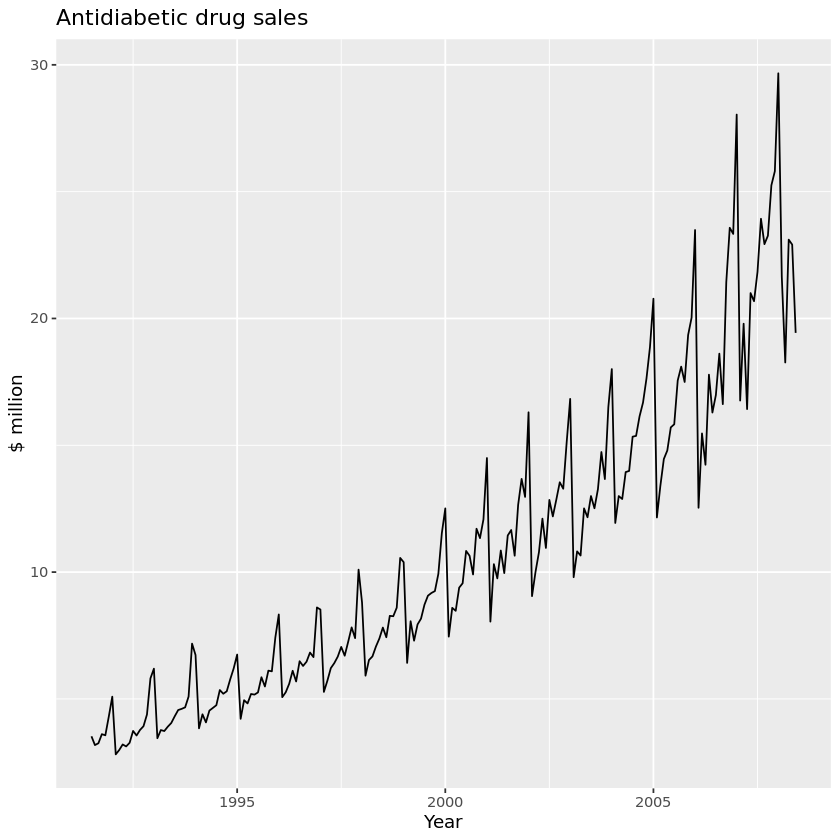

In [12]:
data(a10)
autoplot(a10) +
  ggtitle("Antidiabetic drug sales") +
  ylab("$ million") +
  xlab("Year")

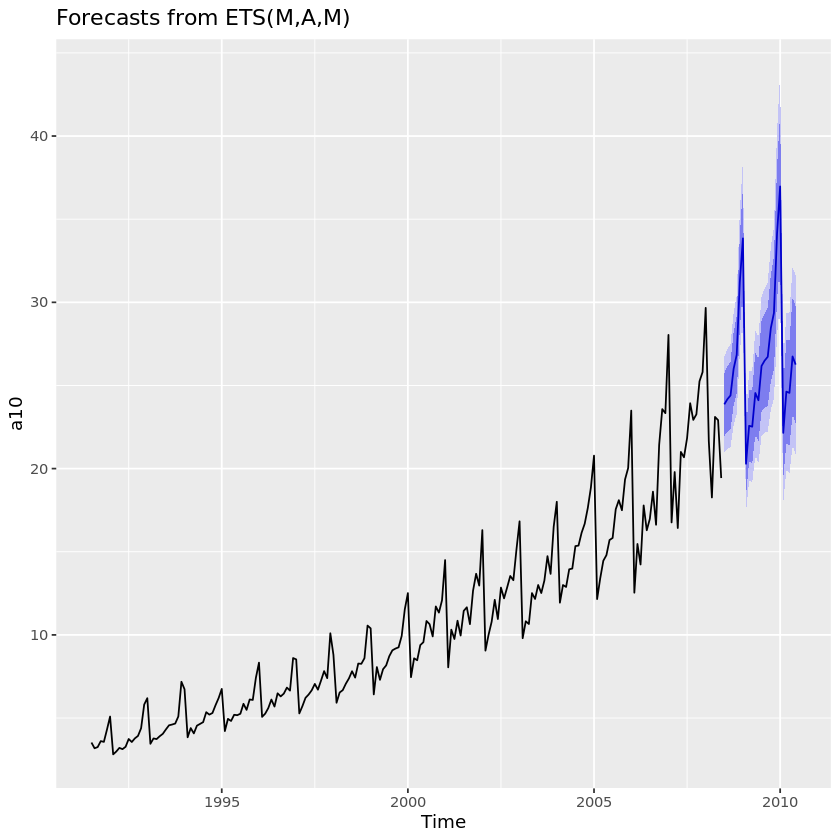

In [13]:
nMonthsForecast <- 24

ets(a10) %>% 
  forecast(nMonthsForecast) %>% 
  autoplot()

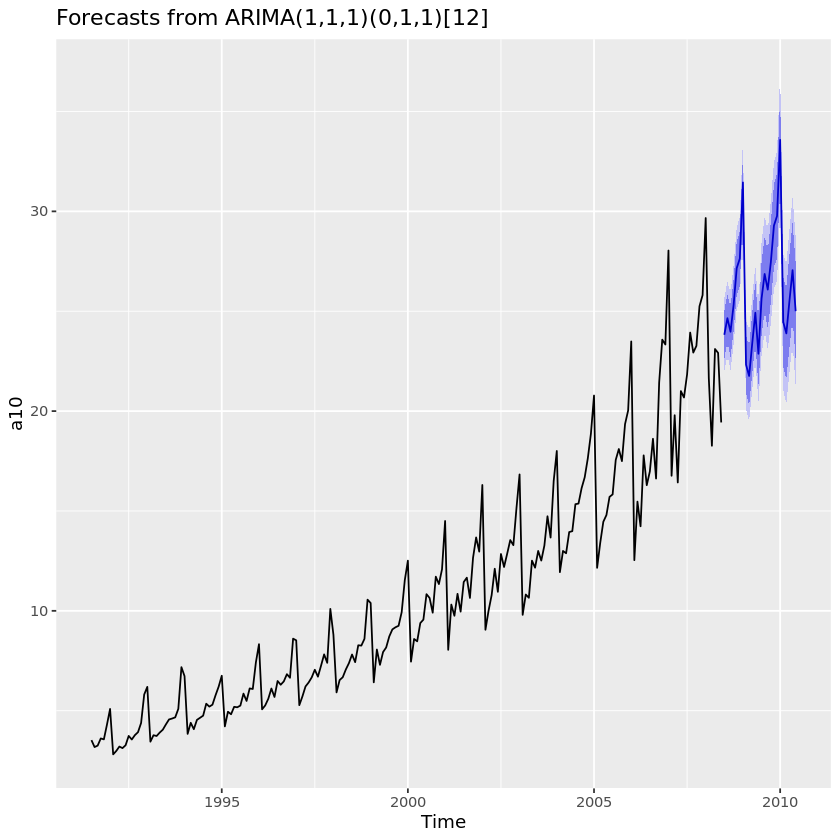

In [14]:
auto.arima(a10) %>% 
  forecast(nMonthsForecast) %>% 
  autoplot()

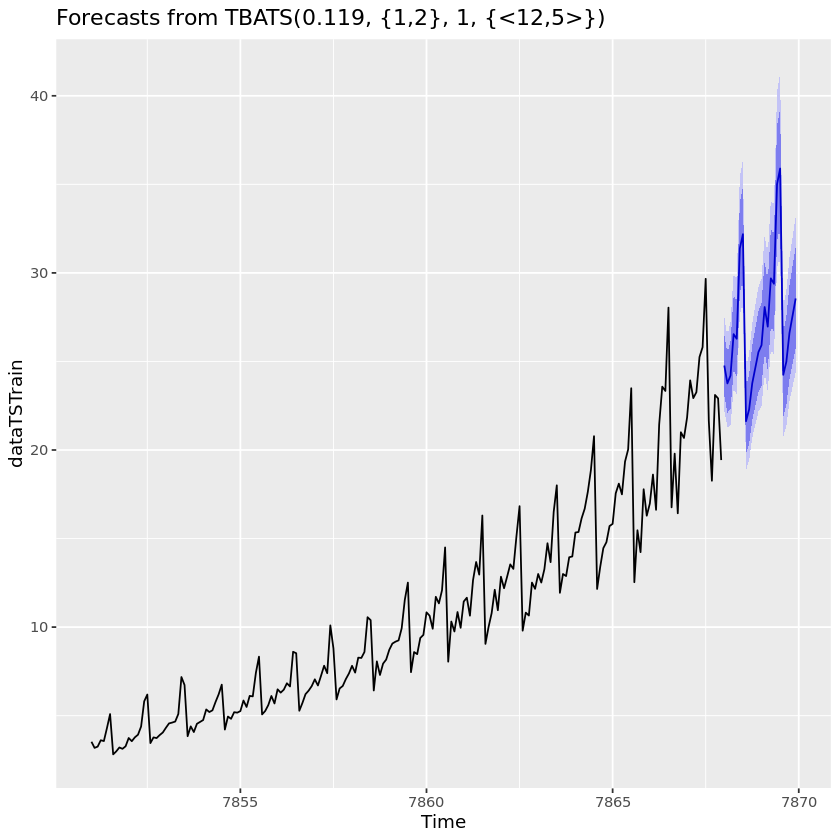

In [15]:
AutoTS(data = data.frame(
  month = ymd(paste(time(a10) %/% 1, round((time(a10) %% 1) * 12 + 1), 1, sep= ' ')),
  sales = c(a10)), 
  TargetName = "sales", DateName = "month",
  FCPeriods = nMonthsForecast, HoldOutPeriods = 12,
  TimeUnit = "month", SkipModels = c("DSHW", "NNET", "ARFIMA"), 
  PrintUpdates = FALSE, TSClean = FALSE, ModelFreq = FALSE,
  NumCores = detectCores()) %>%
  .$TimeSeriesModel %>%
  forecast(nMonthsForecast) %>% 
  autoplot()

### Let's import a few additional graphics libraries

You can use [RBokeh](https://hafen.github.io/rbokeh/) package to create interactive illustrations. 
According the documenation page:

> "*Bokeh is a visualization library that provides a flexible and powerful declarative framework for creating web-based plots. Bokeh renders plots using HTML canvas and provides many mechanisms for interactivity. Bokeh has interfaces in Python, Scala, Julia, and now R.*"

`rbokeh` comes standard with SageMaker's R kernel. You can import the library as follows:

>`library(rbokeh)`



In [16]:
# Import rbokeh library
library(rbokeh)


Attaching package: ‘rbokeh’

The following object is masked from ‘package:ggplot2’:

    arrow



<h3>Create zip archive of the Custom R Environment</h3>

The `Session` class provides operations for working with the following [boto3](https://boto3.amazonaws.com/v1/documentation/api/latest/index.html) resources with Amazon SageMaker:

* [S3](https://boto3.readthedocs.io/en/latest/reference/services/s3.html)
* [SageMaker](https://boto3.readthedocs.io/en/latest/reference/services/sagemaker.html)
* [SageMakerRuntime](https://boto3.readthedocs.io/en/latest/reference/services/sagemaker-runtime.html)

Let's create an [Amazon Simple Storage Service](https://aws.amazon.com/s3/) bucket for your data. 

<h3>First we need to save the environment on the instance's EBS storage. This can be done by cloning the environment with the conda command.</h3> 

**Note** This command should be run in a Terminal window:

> conda create --prefix /home/ec2-user/SageMaker/envs/custom-r --clone R

In [ ]:
# Alternately, run the command here using system() command
#system("conda create --prefix /home/ec2-user/SageMaker/envs/custom-r --clone R", intern=TRUE)

<h3>Now that we have cloned the local R environment, let's run zip command to store environment in archive</h3>

In [ ]:
system("zip --quiet --recurse-paths ~/SageMaker/custom_r.zip ~/SageMaker/envs/", intern=TRUE)

In [ ]:
system("ls -lh ~/SageMaker/custom_r.zip", intern=TRUE)

**Note** - The `default_bucket` function creates a unique Amazon S3 bucket with the following name: 

`sagemaker-<aws-region-name>-<aws account number>`

Specify the IAM role's [ARN](https://docs.aws.amazon.com/general/latest/gr/aws-arns-and-namespaces.html) to allow Amazon SageMaker to access the Amazon S3 bucket. You can use the same IAM role used to create this Notebook:

In [ ]:
print(paste("s3 Default bucket:", bucket))
s3_prefix="custom_kernels"
print(paste("S3 Prefix:",s3_prefix))

In [ ]:
# Upload the zip archive from local EBS volume to S3 in the default bucket
session$upload_data(path = '../custom_r.zip', 
                    bucket = bucket, 
                    key_prefix = s3_prefix)

<h3>The <i>custom_r.zip</i> file can now be used in a LifeCycle configuration script to preload the kernel with our dependencies!</h3>